# **Trend Forecasting of EV Adoption in Relation to Charging Infrastructure and Gasoline Prices**

### **SC3021 Project – AY24/25 Semester 2**
**Muhammad Nur Haziq Bin Abdullah (U2310792G)**
<br>**Sinfuego Summer Daphne Tan (U2311061B)**
<br>**Tee Kai Yang (U2410470A)**

## **Hypothesis/analysis Goal**

The shift towards Electric Vehicles (EV) has become a global phenomenon in response to climate change and the need for more sustainable transport. As a result, Electric Vehicle (EV) adoption has been growing globally, but adoption rates vary significantly across regions due to factors such as infrastructure, government incentives, fuel prices, and consumer preferences. Understanding these factors can help policymakers and businesses accelerate EV adoption.

This project aims to analyse and investigate the correlation between three key variables:
*   **EV Sales**
*   **Charging Infrastructure Availability**
*   **Fuel Prices**

We hypothesise that:
*   An ***increase*** in the number of EV charging stations is *positively correlated* with an ***increase*** in EV adoption.
*   An ***increase*** in gasoline prices is *positively correlated* with an ***increase*** in EV adoption, as customers seek cost-efficient alternatives to vehicles fueled by gasoline.

To validate this hypothesis, we will analyse historical data and apply **regression** and **time series forecasting** techniques to model interdependencies and trends for the past years, as well as projections for future years. The findings can help policymakers, manufacturers, and infrastructure planners make data-driven decisions surrounding EVs and their adoption.






Moreover, we chose to narrow our investigation down to within the United States for several reasons:
1.   **Leader in Global EV Growth**: The USA has one of the most influential and rapidly growing EV markets globally. The country's national goals complement this, such as aiming for 50% of new car sales to be EVs by 2030. This allows the USA's EV landscape to greatly complement our investigation.
2.   **Accelerated EV Infrastructure**: The USA has committed billions of dollars to expanding EV infrastructure, including the Bipartisan Infrastructure Law which allocates over $7.5 billion to public charging networks.
3. **Ideal Case Study for Policy**: The USA's policies, fluctuating fuel prices, and growing public awareness on EVs makes it an ideal real-world case study for investigating how economic and infrastructural factors influence EV adoption.

Thus, focusing on the US not only gives us ample data to work with and analyse, but also produce insights that are highly applicable and relevant to current and future policymaking and infrastructure planning.


## **Data Source Identification & Exploration**

### Requirements Analysis

To most effectively analyse the relationship between our three variables (EV adoption, charging infrastructure, gasoline prices) and forecast trends through 2026, we will need appropriate data to work on. To do this, a clear and thorough requirements analysis is essential, ensuring our data is most appropriate and aligned with our hypothesis, while supporting both statistical modeling and time series forecasting.

To ensure accurate and meaningful analysis, we require:

1. **Sufficient historical data** (past 5-10 years) to analyze trends.
2. **Multiple datasets** (at least 3) to cross-validate findings.

To meet our investigation's goals, the datasets we use must satisfy the following criteria:

1. **Sufficient historical data**: The data must span a consistent and considerably length time period (preferably from early 2010 to late 2024/early 2025) to allow for meaningful trend analysis allowing us to forecast for the future.

2. **Date granularity by month**: Datasets should ideally be aggregated by month (or even more granular) allowing us to explore correlations and trends in deeper detail.

3. **Geographic consistency**: All datasets must have complete data on the United States (as our investigation is focused on the USA).

4. **Completeness and high data quality**: We are looking for well-defined, consistently formatted, high quality datsets with ideally no null values.

5. **Well-structured**: We want well-structured datasets, enabling direct aggregation, leading to regression and time series forecasting without the need for extensive codes to prepare the data.

Keeping these in mind, we will look for 6 datasets that provides data on our three variables (i.e. 2 for EV adoption, 2 for EV infrastructure, 2 for gasoline prices), and will be conducting final selection of what datasets to use via data profiling.

### Datasets Gathered

Hence, we gathered 6 sources that we will be choosing from for our analysis:

**EV Adoption Rates**
- DS1: https://www.kaggle.com/datasets/patricklford/global-ev-sales-2010-2024
- DS2: https://www.anl.gov/sites/www/files/2025-03/Total%20Sales%20for%20Website_February%202025.pdf

**Charging Infrastucture**
- DS3: https://www.kaggle.com/datasets/vivekattri/global-ev-charging-stations-dataset
- DS4: https://www.kaggle.com/datasets/salvatoresaia/ev-charging-stations-us

**Gasoline Price**
- DS5: https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=EMM_EPM0_PTE_NUS_DPG&f=W
- DS6: https://www.kaggle.com/datasets/zusmani/petrolgas-prices-worldwide

In the data profiling process, we will outline the sources above and justify our final source selection.

## **Importing modules**

We are performing time series forecasting using the **ARIMA** model, which requires the `pmdarima` library.  
To ensure compatibility during installation, we first install a specific version of `numpy` that is known to work well with `pmdarima`.

In [ ]:
!pip install pmdarima
!pip install numpy==1.25.2 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 57.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.


The rest of the modules are required too.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import skew
import numpy as np
import statsmodels.api as sm

For each dataset we gathered, we will be conducting data profiling. Based on the requirements analysis, data profiling will comprise of the following main steps and information we identify about the dataset:

**1.   Basic Dataset Info**
*   **Number of rows**
*   **Number of columns**
*   **Column names**
*   **Date range (month/year)**

**2.   Null values per column**

**3. Sample of dataset (first few rows)**

These steps and implementation during the data profiling process may vary based on the individual characteristics (e.g. global vs USA) and data available in each dataset.


We decided not to use some conventional data profiling steps such as measures of central tendency and outliers (e.g. finding the mean/median/mode and standard deviation), as these profiling steps are not pertinent to our investigation and data which we are expecting to naturally have fluctuations that do not correspond to a certain pattern. Hence, we decided on the most suitable data profiling methodology to be the one enumerated above.

## **Data Profiling**

### Dataset 1 (DS1)


**DS1**, obtained from [Kaggle](https://www.kaggle.com/datasets/patricklford/global-ev-sales-2010-2024), provides a varied assortment of EV-related data **worldwide**. We intend to use this dataset to provide insight into EV adoption rates. Before determining whether we were to use this dataset, we conducted data profiling.

In [ ]:
ds1 = pd.read_csv("ds1.csv")

print("Basic Dataset Info")
print(f"Rows: {ds1.shape[0]}")
print(f"Columns: {ds1.shape[1]}")
print(f"Column Names: {ds1.columns.tolist()}")
print(f"Range of years for Historical data: {ds1[ds1['category'] == 'Historical']['year'].min()} to {ds1[ds1['category'] == 'Historical']['year'].max()}")

Basic Dataset Info
Rows: 12654
Columns: 8
Column Names: ['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit', 'value']
Range of years for Historical data: 2010 to 2023


DS1 contains a total of **12,654 rows**, and **8 columns** spanning a multi-dimensional view of EV metrics. Historical data for this dataset spans from **2010 to 2023**, sorted by `Year`, and goes into the further years with projection data.

It is worth noting that some columns, such as `category` and `parameter`, contain attributes that are not relevant to our investigation, such as `Projection-APS` and `EV stock` respectively. Our goal for this dataset is to gain insight into EV sales and adoption rates.

In [ ]:
usa_count = ds1[ds1['region'] == 'USA'].shape[0]
print(f"USA data: {usa_count}")

USA data: 737


We also are only interested in **USA EV data**. Data profiling helps us in finding out how much USA data is available. We find that **737 rows** of USA data is available, quite a substantial number still. However, this contains both needed and unnecessary data for our requirements, e.g. it still includes projections.

In [ ]:
print("\nNull Values Per Column")
print(ds1.isnull().sum())
print(f"Percentage of null values: {(ds1.isnull().sum())/(ds1.shape[0])*100}%")


Null Values Per Column
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64
Percentage of null values: region        0.0
category      0.0
parameter     0.0
mode          0.0
powertrain    0.0
year          0.0
unit          0.0
value         0.0
dtype: float64%


It is also highly important to ascertain if there are any null values in the dataset. Based on the output, there is no missing values, which is promising.

In [ ]:
print("\nSample Data")
ds1 = ds1[ds1['region'] == 'USA']
print(ds1.head())


Sample Data
      region    category                      parameter  mode powertrain  \
10667    USA  Historical                       EV sales  Cars        BEV   
10668    USA  Historical                       EV stock  Cars        BEV   
10669    USA  Historical           Oil displacement Mbd  Cars         EV   
10670    USA  Historical  Oil displacement, million lge  Cars         EV   
10671    USA  Historical             Electricity demand  Cars         EV   

       year                           unit       value  
10667  2010                       Vehicles  1200.00000  
10668  2010                       Vehicles  3800.00000  
10669  2010         Milion barrels per day     0.00016  
10670  2010  Oil displacement, million lge     9.40000  
10671  2010                            GWh    96.00000  


Sample data, limiting region to the USA, is visualised with the code above.

With this, we are able to evaluate the pros and cons of DS1:

**Pros**
*   High data quality, with no nulls, and well-labeled fields.
*   High granularity, allowing for highly segmented analysis.

**Cons**
*   High granularity, requiring significant filtering and aggregation to conduct our analyses.
*   A large number of attributes and data are inapplicable for our project, leaving few left.
*   Data is not very updated, with historical data ending at 2023.
* Data is in `Year` format, not allowing for more detail (i.e. cannot ascertain Month from data).



Hence, we decided to **not use DS1 in our project**, as we felt that the limited range of dates and largely unusable data may lead us to discover better options for gaining insight on EV Adoption in the USA.

### Dataset 2 (DS2)

**DS2**, obtained from [Argonne National Laboratory in the US](https://www.anl.gov/sites/www/files/2025-03/Total%20Sales%20for%20Website_February%202025.pdf), provides data **exclusively on EV sales in the USA**, making it simpler to derive insights into adoption rates. As with DS1, we first conducted data profiling. The data was initially only available in PDF form, so we first converted it to .xlsx then to .csv for our profiling.

In [ ]:
ds2 = pd.read_csv("ds2.csv")

print("Basic Dataset Info")
print(f"Rows: {ds2.shape[0]}")
print(f"Columns: {ds2.shape[1]}")
print(f"Column Names: {ds2.columns.tolist()}")
print(f"Date range: {pd.to_datetime(ds2['Month'], format='%b-%y').min().strftime('%b-%y')} to {pd.to_datetime(ds2['Month'], format='%b-%y').max().strftime('%b-%y')}")

print("\nNull Values Per Column")
print(ds2.isnull().sum())
print(f"Percentage of null values: {(ds2.isnull().sum())/(ds2.shape[0])*100}%")

Basic Dataset Info
Rows: 171
Columns: 5
Column Names: ['Month', 'BEV', 'PHEV', 'HEV', 'Total LDV']
Date range: Dec-10 to Feb-25

Null Values Per Column
Month        0
BEV          0
PHEV         0
HEV          0
Total LDV    0
dtype: int64
Percentage of null values: Month        0.0
BEV          0.0
PHEV         0.0
HEV          0.0
Total LDV    0.0
dtype: float64%


DS2 contains 171 rows and 5 columns. All columns are applicable to our investigation; with this dataset, we aim to derive insights into EV adoption rates, hence we need adoption data for `BEV`, `PHEV`, and `HEV` and it would be beneficial to express it as a percentage of `Total LDV` to ascertain the adoption of EVs out of all LDVs.

The dates on the dataset are formatted in `Month-YY`, so that we can do a more detailed analysis on EV adoption trends with regards to time. The date range is also very wide and covers up until very recently, from **Dec 2010 to Feb 2025**.

DS2 doesn't contain any null values either, which is beneficial for our analysis.

In [ ]:
print("\nSample Data")
print(ds2.head())


Sample Data
    Month  BEV PHEV     HEV  Total LDV
0  Dec-10   19  326  28,592  1,144,840
1  Jan-11  103  321  19,540    819,938
2  Feb-11   83  281  23,306    993,535
3  Mar-11  298  608  34,533  1,246,668
4  Apr-11  573  493  25,602  1,157,928


The code above provides a sample outlook into what the data from DS2 looks like.

We then evaluated the pros and cons of DS2:

**Pros**
*   High data quality, with no nulls, and well-labeled fields.
*   Simplicity of aggregation for country, as all data is from the USA.
*   Wide coverage of dates, from Dec 2010 extending all the way to quite recent at Feb 2025.
* Data allows for more detailed date aggregation with Month available.

**Cons**
*   No significant cons as this dataset is very fitting with our analysis.

In line with this, we decided **to use DS2** for our investigation as we believe it is a great fit for what we want to find (EV adoption trends), the granularity of dates, and the ease of aggregation with all data being from the USA.

### Dataset 3 (DS3)

**DS3**, obtained from [Kaggle](https://www.kaggle.com/datasets/vivekattri/global-ev-charging-stations-dataset), gives a look into EV stations **worldwide**. We conducted the following data profiling steps:

In [ ]:
ds3 = pd.read_csv("ds3.csv")

print("Basic Dataset Info")
print(f"Rows: {ds3.shape[0]}")
print(f"Columns: {ds3.shape[1]}")
print(f"Column Names: {ds3.columns.tolist()}")
print(f"Range: {ds3['Installation Year'].min()} to {ds3['Installation Year'].max()}")

print("\nNull Values Per Column")
print(ds3.isnull().sum())
print(f"Percentage of null values: {(ds3.isnull().sum())/(ds3.shape[0])*100}%")

Basic Dataset Info
Rows: 5000
Columns: 17
Column Names: ['Station ID', 'Latitude', 'Longitude', 'Address', 'Charger Type', 'Cost (USD/kWh)', 'Availability', 'Distance to City (km)', 'Usage Stats (avg users/day)', 'Station Operator', 'Charging Capacity (kW)', 'Connector Types', 'Installation Year', 'Renewable Energy Source', 'Reviews (Rating)', 'Parking Spots', 'Maintenance Frequency']
Range: 2010 to 2023

Null Values Per Column
Station ID                     0
Latitude                       0
Longitude                      0
Address                        0
Charger Type                   0
Cost (USD/kWh)                 0
Availability                   0
Distance to City (km)          0
Usage Stats (avg users/day)    0
Station Operator               0
Charging Capacity (kW)         0
Connector Types                0
Installation Year              0
Renewable Energy Source        0
Reviews (Rating)               0
Parking Spots                  0
Maintenance Frequency          0
dtype: 

This dataset has **5000 rows** and **17 columns**, most of which are unneeded for our analysis (unneeded columns include `Latitude`, `Charger Type`, and `Station Operator`, among others). The range of data is from **2010-2023**, and this is formatted by `Installation Year`, making the dataset not as specific (to month) and updated as it would ideally be.

One upside, however, is that there are no null values in the dataset, indicating data completeness.

In [ ]:
print("\nLocation Data")
print(ds3['Address'].head())
print(f"Number of Unique Addresses: {ds3['Address'].nunique()}")


Location Data
0         4826 Random Rd, City 98, Country
1    8970 San Francisco Ave, San Francisco
2                5974 Bangkok Ave, Bangkok
3                6995 Toronto Ave, Toronto
4                  5704 Mumbai Ave, Mumbai
Name: Address, dtype: object
Number of Unique Addresses: 4933


As this is a dataset for global EV charging stations, we are only looking for USA stations and would like to filter the data based on this. However, there may be barriers to this, as EV charging stations' address attribute is not simply the Country but are in a City, Country format, e.g. `Beijing, China`. The code above shows more examples of this.

This leads to 4933 unique station addresses, and this would make it considerably more difficult than ideal for us to sort our data by USA-only, creating extra steps in our data preparation.

In [ ]:
print("\nSample Data")
print(ds3.head())


Sample Data
  Station ID   Latitude   Longitude                                Address  \
0   EVS00001 -33.400998   77.974972       4826 Random Rd, City 98, Country   
1   EVS00002  37.861857 -122.490299  8970 San Francisco Ave, San Francisco   
2   EVS00003  13.776092  100.412776              5974 Bangkok Ave, Bangkok   
3   EVS00004  43.628250  -79.468935              6995 Toronto Ave, Toronto   
4   EVS00005  19.119865   72.913368                5704 Mumbai Ave, Mumbai   

      Charger Type  Cost (USD/kWh) Availability  Distance to City (km)  \
0       AC Level 2            0.27   9:00-18:00                   4.95   
1  DC Fast Charger            0.19         24/7                   4.96   
2       AC Level 2            0.48   6:00-22:00                   8.54   
3       AC Level 1            0.41   9:00-18:00                  13.28   
4       AC Level 2            0.11   9:00-18:00                   9.76   

   Usage Stats (avg users/day) Station Operator  Charging Capacity (kW)  

The above code shows a sample of data from this dataset, including all columns.

Hence, we evaluated the pros and cons of DS3:

**Pros**
*   High data quality; no empty fields, as well as well-labeled data.
*   Very specific data, allowing for highly in-depth analysis.
*   Large coverage of data, covering multiple regions and metrics.

**Cons**
*   Highly specific data, especially for station addresses, providing challenges in data filtering and aggregation.
*   A large number of attributes and data are inapplicable for our project, leaving few left.
*   Data is not very updated, with historical data ending at 2023.
* Data is in `Year` format, not allowing for more detail (i.e. cannot ascertain Month from data).

As a result, we decided **not to use DS3** for our analysis. The date range is considerably limited and not recent enough. Another highly substantial factor is the added number of steps required to filter out non-USA data whereas other datasets may make this task easier.

### Dataset 4 (DS4)

**DS4**, also from [Kaggle](https://www.kaggle.com/datasets/salvatoresaia/ev-charging-stations-us), provides a **US-specific** outlook into EV charging stations. This automatically makes it more suitable for our USA-focused analysis. Our data profiling included the following.

In [ ]:
ds4 = pd.read_csv("ds4.csv")

print("Basic Dataset Info")
print(f"Rows: {ds4.shape[0]}")
print(f"Columns: {ds4.shape[1]}")
#print(f"Column Names: {ds4.columns.tolist()}")
print(f"Date range: {pd.to_datetime(ds4['Open Date'], format='%m/%d/%y').min().strftime('%m/%d/%Y')} to {pd.to_datetime(ds4['Open Date'], format='%m/%d/%y').max().strftime('%m/%d/%Y')}")

#print("\nNull Values Per Column")
#print(ds4.isnull().sum())
print(f"Null values: {ds4['Open Date'].isnull().sum()}")
print(f"Percentage of null values: {(ds4['Open Date'].isnull().sum())/(ds4['Open Date'].shape[0])*100}%")

Basic Dataset Info
Rows: 65134
Columns: 74
Date range: 08/30/1995 to 09/01/2024
Null values: 79
Percentage of null values: 0.12128842079405533%


<ipython-input-11-63a9828587e1>:1: DtypeWarning: Columns (6,20,31,46,69,73) have mixed types. Specify dtype option on import or set low_memory=False.
  ds4 = pd.read_csv("ds4.csv")


DS4 contains a whopping **65134 rows** and **74 columns**. As expected, most of the 74 columns are irrelevant to our analysis– in fact, only one column is important in our analysis, and that is the `Open Date` column, indicating the exact date when the charging station was opened.

However, an issue may be that the date under `Open Date` is in the `MM/DD/YY` format, requiring us to parse the data into `MM/YY` for our aggregation and analysis. Nonetheless, it is beneficial that the data sorts by Month as compared to other datasets that only include Year. There is a very wide range of data for `Open Date`, from **08/1995 to 09/2024**, which is fairly recent and benefits our analysis.

The data also has a large amount of null values, and a considerable amount of null values (79) for the column relevant to our analysis, `Open Date`. This is certainly a downside of this dataset, albeit it is just 0.12% of all data in the column.

In [ ]:
print("\nSample Data")
print(ds4.head())


Sample Data
  Fuel Type Code                       Station Name      Street Address  \
0           ELEC           LADWP - Truesdale Center  11797 Truesdale St   
1           ELEC      Los Angeles Convention Center  1201 S Figueroa St   
2           ELEC      LADWP - John Ferraro Building       111 N Hope St   
3           ELEC         LADWP - Haynes Power Plant       6801 E 2nd St   
4           ELEC  LADWP - Harbor Generating Station    161 N Island Ave   

    Intersection Directions         City State    ZIP  Plus4 Station Phone  \
0                       NaN   Sun Valley    CA  91352    NaN           NaN   
1  West hall and South hall  Los Angeles    CA  90015    NaN  213-741-1151   
2               Across Hope  Los Angeles    CA  90012    NaN           NaN   
3                       NaN   Long Beach    CA  90803    NaN           NaN   
4                   At B St   Wilmington    CA  90744    NaN           NaN   

  Status Code  ...  Restricted Access RD Blends RD Blends (French) 

The visualisation above shows the first few rows of the dataset. It is noticeable that the locations for the charging stations have three formats: the exact `Street Address`, the `City`, the `State`, or the `ZIP`. Nonetheless, despite the specificity of the stations' locations, it does not affect our analysis whatsoever since we are already aware that all rows indicate charging stations in the USA, thus we only need to aggregate all rows.

This then allows us to evaluate the pros and cons of DS4:

**Pros**
*   Large array of detailed data, allowing for in-depth analysis.
*   Simplicity of aggregation for country, as all data is from the USA.
*   Wide coverage of dates, from 1995 extending all the way to quite recent at 2024.
* Data allows for more detailed date aggregation with Month available.

**Cons**
*   `Open Date` still requires data parsing, leading to extra code needed for aggregation.
*   A large number of attributes and data are inapplicable for our project, with only one column applicable.
*   Data is not most updated (can be more updated if ended at 2025).
* There are a considerable amount of empty fields for the column we want to use.

We decided to **use DS4** in our analysis. This is because we found the considerable recency of dates advantageous, and the ease of aggregating charging stations for USA. While there is still an extra layer of code needed to sort `Open Date` by year, this is much simpler to do, as compared to DS3 which would be more complex to sort by country. Nonetheless, due to the amount of null values for `Open Date`, it is necessary to keep this in mind during the analysis to see whether this greatly affects the data.

### Dataset 5 (DS5)

**DS5** is provided by the [U.S. Energy Information Administration](https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=emm_epm0_pte_nus_dpg&f=a), and gives us the **US**'s retail gasoline prices sorted by month, which may have correlations with EV adoption. This automatically makes it more suitable for our USA-focused analysis. Our data profiling included the following.

In [ ]:
ds5 = pd.read_csv("ds5.csv")

print("Basic Dataset Info")
print(f"Rows: {ds5.shape[0]}")
print(f"Columns: {ds5.shape[1]}")
print(f"Column Names: {ds5.columns.tolist()}")
print(f"Date range: {pd.to_datetime(ds5['Month'], format='%b-%y').min().strftime('%b-%y')} to {pd.to_datetime(ds5['Month'], format='%b-%y').max().strftime('%b-%y')}")

print("\nNull Values Per Column")
print(ds5.isnull().sum())
print(f"Percentage of null values: {(ds5.isnull().sum())/(ds5.shape[0])*100}%")

Basic Dataset Info
Rows: 384
Columns: 2
Column Names: ['Month', 'U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon']
Date range: Apr-93 to Mar-25

Null Values Per Column
Month                                                                         0
U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon    0
dtype: int64
Percentage of null values: Month                                                                         0.0
U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon    0.0
dtype: float64%


DS5 allows for simple reading and analysis, with **384 rows** and only **2 columns** which are both useful in our investigation, with the columns indicating the `Month` and `Dollars per Gallon`, respectively. The date is in the `Month-YY` format, allowing for easy and detailed analysis compared to a more complex format or simply `Year`. The date range is highly covered as well and very updated, spanning from **April 1993 to March 2025**.

Another beneficial aspect to this dataset is the lack of null values, allowing for a complete analysis with no gaps.

In [ ]:
print("\nSample Data")
print(ds5.head())


Sample Data
    Month  \
0  Mar-25   
1  Feb-25   
2  Jan-25   
3  Dec-24   
4  Nov-24   

   U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon  
0                                              3.223                           
1                                              3.247                           
2                                              3.196                           
3                                              3.139                           
4                                              3.175                           


The above code shows the first few (most recent) rows of the dataset.

We can evaluate the pros and cons of DS5:

**Pros**
*   High data quality, with no nulls, and all fields/attributes useful for our analysis.
*   Simplicity of aggregation for country, as all data is from the USA.
*   Wide coverage of dates, from Apr 1993 extending all the way to quite recent at Mar 2025.
* Data allows for more detailed date aggregation with Month available.

**Cons**
*   No significant cons as this dataset is very fitting with our analysis.

As a result, we pushed through with **using DS5** for our analysis due to the many pros it provides (such as usefulness of all data, coverage and detail of dates, simplicity of country) and virtually no cons due to being completely in line with what we want to explore.

### Dataset 6 (DS6):

Lastly, we had DS6, obtained from [Kaggle](https://www.kaggle.com/datasets/zusmani/petrolgas-prices-worldwide). We looked to DS6 to fulfill a role similar to DS5, to gain insight into petrol/gasoline prices that may have a correlation to EV adoption. We carried out data profiling:

In [ ]:
ds6 = pd.read_csv("ds6.csv")

print("Basic Dataset Info")
print(f"Rows: {ds6.shape[0]}")
print(f"Columns: {ds6.shape[1]}")
print(f"Column Names: {ds6.columns.tolist()}")

print("\nNull Values Per Column")
print(ds6.isnull().sum())
print(f"Percentage of null values: {(ds6.isnull().sum())/(ds6.shape[0])*100}%")

Basic Dataset Info
Rows: 181
Columns: 11
Column Names: ['s', 'Country', 'Daily Oil Consumption (Barrels)', 'World Share', 'Yearly Gallons Per Capita', 'Price Per Gallon (USD)', 'Price Per Liter (USD)', 'Price Per Liter (PKR)', 'GDP Per Capita ( USD )', 'Gallons GDP Per Capita Can Buy', 'xTimes Yearly Gallons Per Capita Buy']

Null Values Per Column
s                                       0
Country                                 0
Daily Oil Consumption (Barrels)         0
World Share                             0
Yearly Gallons Per Capita               0
Price Per Gallon (USD)                  0
Price Per Liter (USD)                   0
Price Per Liter (PKR)                   0
GDP Per Capita ( USD )                  0
Gallons GDP Per Capita Can Buy          0
xTimes Yearly Gallons Per Capita Buy    0
dtype: int64
Percentage of null values: s                                       0.0
Country                                 0.0
Daily Oil Consumption (Barrels)         0.0
World Share    

DS6 contains **181 rows** and **11 columns**, indicating petrol price data spanning 181 countries. But more importantly, whilst conducting data profiling, we discovered that this dataset lacks one giant functionality that we need for our analysis: Dates over time. DS6 essentially provides a snapshot into global petrol prices at 23 June, 2022, with no insight on any other dates. This is a big part missing of the dataset due to the nature of our investigation. That doesn't make this dataset bad, per se, especially as it has positive aspects such as the lack of null values– this dataset is just not suitable for our use in this investigation.

In [ ]:
print("\nSample Data")
print(ds6.head())


Sample Data
   s        Country Daily Oil Consumption (Barrels) World Share  \
0  1  United States                      19,687,287         20%   
1  2          China                      12,791,553         13%   
2  3          India                       4,443,000          5%   
3  4          Japan                       4,012,877          4%   
4  5         Russia                       3,631,287          4%   

   Yearly Gallons Per Capita  Price Per Gallon (USD)  Price Per Liter (USD)  \
0                      934.3                    5.19                   1.37   
1                      138.7                    5.42                   1.43   
2                       51.4                    5.05                   1.33   
3                      481.5                    4.69                   1.24   
4                      383.2                    3.41                   0.90   

   Price Per Liter (PKR) GDP Per Capita ( USD )  \
0                 289.97                 63,414   
1      

For further insight, the above code shows the first few rows of the dataset, which indicates a lack of data for petrol prices over a longer period of time.

Thus comes the pros and cons of DS6:

**Pros**
*   High data quality, with no nulls, and well-labeled fields.

**Cons**
*   Dataset lacks data for petrol prices over time, only providing a snapshot of prices at a specific date, making the dataset unsuitable for our planned investigation.



Unfortunately, that one con is a huge drawback and was enough for us to immediately **turn DS6 away** as an option, even from the start of our data profiling process. Thankfully we were able to find DS5, which provides the more suitable insight we need into this domain (gasoline prices).

### Final Selection on Data

Based on the exploration and data profiling, we have settled down on the following as our final selection on data that we will be using for our analysis:
- **DS2 (EV Sales/Adoption)**
- **DS4 (EV Charging Stations)**
- **DS5 (Gasoline Price)**

## **Data Preparation**

While we have ascertained our datasets are suitable for our investigation, it is still essential to prepare our data for meaningful analysis and modeling. Careful processing is necessary to parse the data of any unnecessary information, as well as standardise data formats into one suitable for our analysis across all our sources.

### DS2: EV Sales/Adoption

With the data from DS2, our objective is to construct a DataFrame that captures the year, month, and the corresponding adoption rate for each time period.

The `Month` attribute is parsed to extract the year and month, which are then stored as new attributes, `Year` and `Month` respectively.


In [ ]:
df = pd.read_csv("ds2.csv")

df["Month"] = pd.to_datetime(df["Month"], format="%b-%y")
df["Year"] = df["Month"].dt.year.astype(int)
df["Month"] = df["Month"].dt.month.astype(int)

The EV adoption rate is determined by calculating the combined value of `BEV`, `PHEV`, and `HEV` as a proportion of the total `LDV`.

In [ ]:
# Converting the data type from string to integer
for col in ["BEV", "PHEV", "HEV", "Total LDV"]:
  df[col] = pd.to_numeric(df[col].str.replace(",", ""), errors="coerce")

# The total EV sales is obtained by the sum of BEV sale, PHEV sale and HEV sale
df["Sales"] = df["BEV"] + df["PHEV"] + df["HEV"]

# The adoption rate is the total EV sales as the proportion of total LDV sales.
df["Adoption Rate"] = df["Sales"] / df["Total LDV"] * 100


Columns irrelevant to our analysis are then dropped.


In [ ]:
df = df.drop(columns=["Sales", "BEV", "PHEV", "HEV", "Total LDV"])

The resulting DataFrame is presented below.

In [ ]:
print(df)

     Month  Year  Adoption Rate
0       12  2010       2.527602
1        1  2011       2.434818
2        2  2011       2.382402
3        3  2011       2.842697
4        4  2011       2.303079
..     ...   ...            ...
166     10  2024      20.663091
167     11  2024      22.142960
168     12  2024      22.358823
169      1  2025      21.988937
170      2  2025      21.267280

[171 rows x 3 columns]


### DS4: EV Charging Stations

With the data from DS4, the goal is to construct a DataFrame that records the cumulative number of charging stations for each time period.

Only columns relevant to our analysis, `Open Date`, will be retained.
The rows with missing `Open Date` value are dropped.

In [ ]:
df1 = pd.read_csv("ds4.csv")

df1 = df1[["Open Date"]]
df1 = df1.dropna(subset=["Open Date"])

<ipython-input-21-20f5f54771bc>:1: DtypeWarning: Columns (6,20,31,46,69,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("ds4.csv")


The `Open Date` attribute is parsed to extract the year and month, which are then stored as new attributes, `Year` and `Month` respectively.


In [ ]:
df1["Open Date"] = pd.to_datetime(df1["Open Date"], format="%m/%d/%y", errors="coerce")
df1["Year"] = df1["Open Date"].dt.year.astype(int)
df1["Month"] = df1["Open Date"].dt.month.astype(int)


The number of charging stations for each time period is counted and an attribute `Charging Stations Added` is created to store the result.

In [ ]:
df1 = df1[["Year", "Month"]].value_counts().reset_index(name="Charging Stations Added")

The dataset is sorted by `Year` and `Month` and the cumulative number of charging stations for each time period is obtained, stored as `Cumulative Charging Stations`.

In [ ]:
# The dataset is sorted by "Year" and "Month"
df1 = df1.sort_values(["Year", "Month"]).reset_index().drop(columns=["index"])

# A cumulative summation is performed to obtain "Cumulative Charging Stations"
df1["Cumulative Charging Stations"] = df1["Charging Stations Added"].cumsum()

Only relevant columns for analysis are retained.

In [ ]:
df1 = df1.drop(columns=["Charging Stations Added"])

The dataset contains some months where no new charging stations were added, resulting in missing rows. However, it is important to retain these missing rows to ensure a continuous time series. For these months, the `Cumulative Charging Stations` value should be **forward-filled**, with the last known cumulative value carried forward.

In [ ]:
# Create a full date range.
full_date_range = pd.date_range(start=f'{df["Year"].min()}-01', end=f'{2024}-12', freq='MS')

# Create a new dataframe with all year/month combinations
full_months_df = pd.DataFrame({
    "Year": full_date_range.year,
    "Month": full_date_range.month
})

# Merge df1 with the full range of months
df1 = full_months_df.merge(df1, on=["Year", "Month"], how="left")

# Forward fill the missing cumulative values
df1["Cumulative Charging Stations"] = df1["Cumulative Charging Stations"].fillna(method='ffill')

<ipython-input-26-33b8ebf1edb5>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1["Cumulative Charging Stations"] = df1["Cumulative Charging Stations"].fillna(method='ffill')


The resulting DataFrame is presented below.

In [ ]:
print(df1)

     Year  Month  Cumulative Charging Stations
0    2010      1                         114.0
1    2010      2                         114.0
2    2010      3                         117.0
3    2010      4                         121.0
4    2010      5                         125.0
..    ...    ...                           ...
175  2024      8                       65054.0
176  2024      9                       65055.0
177  2024     10                       65055.0
178  2024     11                       65055.0
179  2024     12                       65055.0

[180 rows x 3 columns]


### DS5: Gasoline Prices

With the data from DS5, the objective is to construct a DataFrame that captures the gasoline prices corresponding to each time period.

The rows with missing values are dropped and the attribute (column) name for the gasoline prices is shorted for simplicity.

In [ ]:
df2 = pd.read_csv("ds5.csv")

# Rows with missing values are dropped.
df2 = df2.dropna()

# The attribute name is shortened for simplicity.
df2 = df2.rename(columns={"U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon": "Gasoline Price"})
print(df2)

      Month  Gasoline Price
0    Mar-25           3.223
1    Feb-25           3.247
2    Jan-25           3.196
3    Dec-24           3.139
4    Nov-24           3.175
..      ...             ...
379  Aug-93           1.062
380  Jul-93           1.078
381  Jun-93           1.097
382  May-93           1.100
383  Apr-93           1.078

[384 rows x 2 columns]


The `Date` attribute is parsed to extract the year and month, which are then stored as new attributes, `Year` and `Month` respectively.

In [ ]:
df2["Month"] = pd.to_datetime(df2["Month"], format="%b-%y", errors="coerce")
df2["Year"] = df2["Month"].dt.year.astype(int)
df2["Month"] = df2["Month"].dt.month.astype(int)

The data is grouped by `Year` and `Month` and the mean for each time period is calculated.

In [ ]:
df2 = df2.sort_values(["Year", "Month"]).reset_index(drop=True)

The resulting DataFrame is presented as follows.

In [ ]:
print(df2)

     Month  Gasoline Price  Year
0        4           1.078  1993
1        5           1.100  1993
2        6           1.097  1993
3        7           1.078  1993
4        8           1.062  1993
..     ...             ...   ...
379     11           3.175  2024
380     12           3.139  2024
381      1           3.196  2025
382      2           3.247  2025
383      3           3.223  2025

[384 rows x 3 columns]


### **Creation of a Consolidated DataFrame**

### Merging EV Sales/Adoption (df), EV Charging Stations (df1) and Gasoline Price (df2)

The 3 different DataFrames are merged together on `Year` and `Month` to create the final integrated DataFrame.

In [ ]:
# Merging DataFrame 1, DataFrame 2 and DataFrame 3.
df_merged = df.merge(df1, on=["Year", "Month"]).merge(df2, on=["Year", "Month"])

The `Month` and `Year` is combined to create the attribute `Time`.

In [ ]:
df_merged["Time"] = df_merged["Year"].astype(str) + "/" + df_merged["Month"].astype(str)
df_merged = df_merged.drop(columns=["Month", "Year"])

The resulting consolidated DataFrame is presented below.

In [ ]:
print(df_merged)

     Adoption Rate  Cumulative Charging Stations  Gasoline Price     Time
0         2.527602                         154.0           3.048  2010/12
1         2.434818                         162.0           3.148   2011/1
2         2.382402                         172.0           3.264   2011/2
3         2.842697                         642.0           3.615   2011/3
4         2.303079                         655.0           3.852   2011/4
..             ...                           ...             ...      ...
164      21.131483                       65054.0           3.507   2024/8
165      21.393932                       65055.0           3.338   2024/9
166      20.663091                       65055.0           3.261  2024/10
167      22.142960                       65055.0           3.175  2024/11
168      22.358823                       65055.0           3.139  2024/12

[169 rows x 4 columns]


### Data Profiling on the Consolidated DataFrame

Data profiling is carried out to assess the new DataFrame.

In [ ]:
# Check for data completeness.
print(df_merged.isnull().sum())

# Check if the rows are following an chronological order.
is_sorted = df_merged["Time"].is_monotonic_increasing
print(f"Records sorted in chronological order: {is_sorted}")

# Identify any missing months in the dataset to ensure temporal continuity
full_range = pd.date_range(df_merged["Time"].min(), df_merged["Time"].max(), freq="MS")
missing_months = full_range.difference(pd.to_datetime(df_merged["Time"], format='%Y/%m'))
print(f"List of missing months: {missing_months}")

Adoption Rate                   0
Cumulative Charging Stations    0
Gasoline Price                  0
Time                            0
dtype: int64
Records sorted in chronological order: False
List of missing months: DatetimeIndex([], dtype='datetime64[ns]', freq='MS')




* **No missing values** were found in any of the key columns — indicating a complete dataset.
* The records are sorted in **chronological order** – essential for any time series analysis or forecasting.
* The time series is **continuous** with **no missing months** – essential for any time series analysis or forecasting.

## **Data Analytics**

Given that our overarching goal is to determine if there is a correlative relationship between the three variables: Adoption Rate, Cumulative Charging Stations, and Gasoline Prices, we apply the following methods of descriptive, diagnostic, and predictive analysis:
- Data Visualization (Descriptive)
- Spearman Correlation (Diagnostic)
- Time Series Forecasting (Predictive)
- Linear Regression (Predictive)

### Data Visualization

To develop an intuitive understanding of the temporal patterns and possible interactions present among the variables, we visualised the three variables over time using multi-axis line plots.

This enables us to capture individual trends, observe volatility, and in a visual way, suggest co-movement.

In [ ]:
# Creatung Figure
fig = go.Figure()

# Plotting Adoption Rate
fig.add_trace(go.Scatter(
    x = df_merged["Time"],
    y = df_merged["Adoption Rate"],
    name = "Adoption Rate",
    yaxis = "y1",
    line = {"color" : "#6050D4"}
))

# Plotting Cumulative Charging Stations
fig.add_trace(go.Scatter(
    x = df_merged["Time"],
    y = df_merged["Cumulative Charging Stations"],
    name = "Cumulative Charging Stations",
    yaxis = "y2",
    line = {"color" : "#00916E"}
))

# Plotting Gasoline Price
fig.add_trace(go.Scatter(
    x = df_merged["Time"],
    y = df_merged["Gasoline Price"],
    name = "Gasoline Price",
    yaxis = "y3",
    line = {"color" : "#DC493A"}
))

# Layout configuration
fig.update_layout(
    title = "Adoption Rate, Cumulative Charging Stations, and Gasoline Price Over Time",
    xaxis = {"title" : "Time"},

    yaxis = {
        "title" : "Adoption Rate (%)",
        "titlefont" : {"color" : "#6050D4"},
        "tickfont" : {"color" : "#6050D4"}
    },

    yaxis2 = {
        "title" : "Cumulative Charging Stations (Stations)",
        "titlefont" : {"color" : "#00916E"},
        "tickfont" : {"color" : "#00916E"},
        "overlaying" : "y",
        "side" : "right"
    },

    yaxis3 = {
        "title" : "Gasoline Price ($)",
        "titlefont" : {"color" : "#DC493A"},
        "tickfont" : {"color" : "#DC493A"},
        "overlaying" : "y",
        "side" : "right",
        "position" : 0.85  # 0.15 from the right side of the canvas
    },

    legend = {
        "x" : 0.5,
        "y" : 1.1,
        "orientation" : "h",
        "xanchor" : "center"
    },

    height = 600,

    width = 1000
)

fig.show()


As illustrated by the graph, both the adoption rate and cumulative charging stations exhibit a generally increasing trend over time, appearing to rise at a similar pace based on visual inspection. In contrast, gasoline prices show more fluctuation and do not display a clear relationship with the other two variables.

However, this observation is based on visual inspection alone, and no definitive conclusions about the relationships between variables can be drawn from it. Therefore, a formal correlation analysis will be conducted to quantitatively assess the strength and direction of their relationships.

### Correlation Analysis

A correlation analysis is conducted to evaluate the strength and direction of the relationships between the key variables: `Adoption Rate`, `Cumulative Charging Stations`, and `Gasoline Price`.

To do this, we used **Spearman correlation**. It is particularly suited to our context, because our variables exhibit non-linear trends, making Spearman more suitable than Pearson in capturing their relationships without assuming linearity.

The resulting correlation matrix was visualized using a heatmap, providing a clear and intuitive visual representation of the correlation magnitudes and directions.

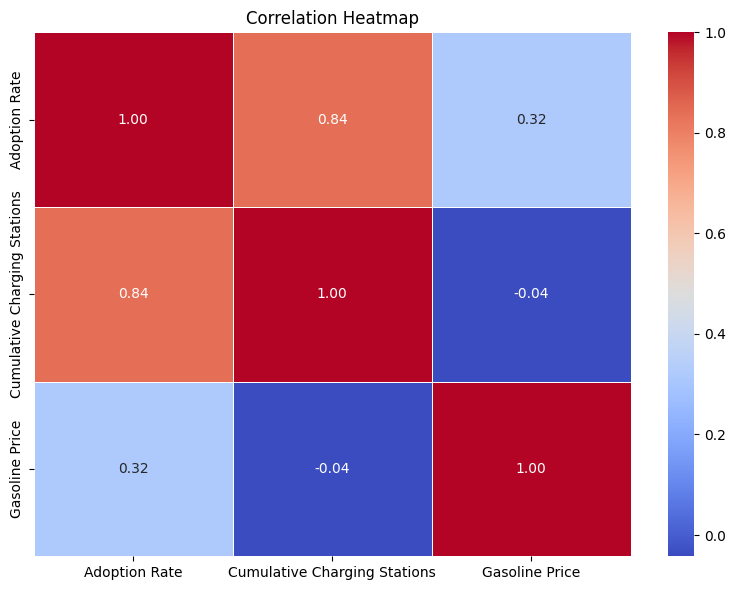

In [ ]:
# Calculate correlation matrix
correlation = df_merged.drop(columns=["Time"]).corr(method="spearman")

# Generating heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

From the correlation analysis, it can be concluded that there is a ***strong positive correlation (+0.84)*** between **EV sales** and the **number of charging stations**, indicating that as the number of charging stations increases, sales tend to rise as well, supporting our hypothesis that infrastructure for EVs is a critical enabler.

On the other hand, the correlation between **EV sales** and **gasoline price** is ***weak but notable (+0.32)***, suggesting a moderate relationship. This indicates that gasoline prices may provide a cost inventive for consumers to switch to or adopt EVs, though this relationship is not dominant or explicitly clear.

These findings provide initial evidence supporting our modeling and analysis that uses the cumulative EV charging stations and gasoline prices as predictors of EV adoption in our coming regression analysis.

### Time Series Forecasting

#### Cumulative Charging Station Forecasting

To forecast future EV charging station infrastructure, we treated the `Cumulative EV Charging Stations` as a univariate time series.

In [ ]:
# Set "Time" as the index
ts = df_merged.set_index("Time")
ts.index = pd.to_datetime(ts.index, format='%Y/%m')

# Retain only "Cumulative Charging Stations"
ts = ts["Cumulative Charging Stations"]

print(ts)

Time
2010-12-01      154.0
2011-01-01      162.0
2011-02-01      172.0
2011-03-01      642.0
2011-04-01      655.0
               ...   
2024-08-01    65054.0
2024-09-01    65055.0
2024-10-01    65055.0
2024-11-01    65055.0
2024-12-01    65055.0
Name: Cumulative Charging Stations, Length: 169, dtype: float64


The initial time series is plotted.

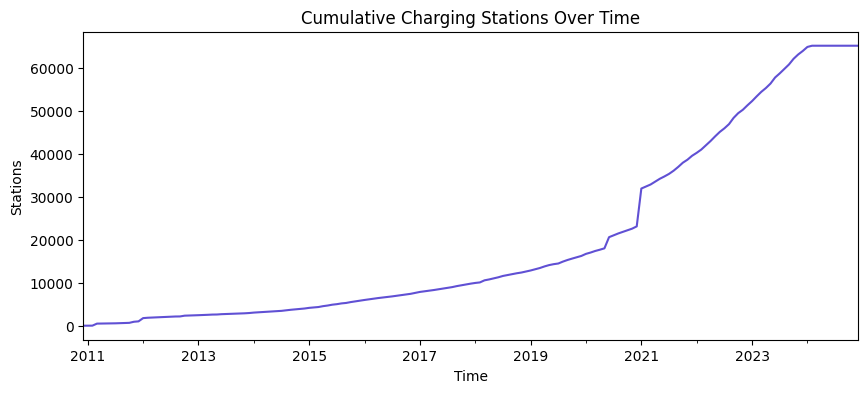

In [ ]:
ts.plot(figsize=(10, 4), color="#6050D4", title="Cumulative Charging Stations Over Time")
plt.ylabel("Stations")
plt.show()

To determine the appropriate degree of differencing ("d") for our time series analysis, we conducted an **Augmented Dickey-Fuller Test**. This test helps assess the **stationarity** of our time series, i.e. whether the model's properties depend on the time at which the series is observed. Here, our null  and alternative hypotheses are the following:
- **Null Hypothesis**: It is non-stationary (exhibits trends and/or seasonality that varies over time).
- **Alternative Hypothesis**: It is stationary (its statistical properties are consistent over time).

In [ ]:
# Initial Test for Stationary
adf_result = adfuller(ts)[1]
print(adf_result)

0.9675948822808471


The Augmented Dickey-Fuller Test gives a **p-value of 0.9606**, a large value that indicates insufficient evidence to reject the null hypothesis. This means that the time series is **non-stationary**, and that **differencing** needs to be carried out until p < 0.05.

In [ ]:
ts_diff = ts.copy()

d = 0 # number of times of differencing needed to the series stationary
while adf_result > 0.05:
  d += 1
  ts_diff = ts_diff.diff().dropna()
  adf_result = adfuller(ts_diff)[1]
  print(f"p-value: {adf_result}")

print(f"d = {d}")

p-value: 0.19161958348245411
p-value: 4.884372583427337e-19
d = 2


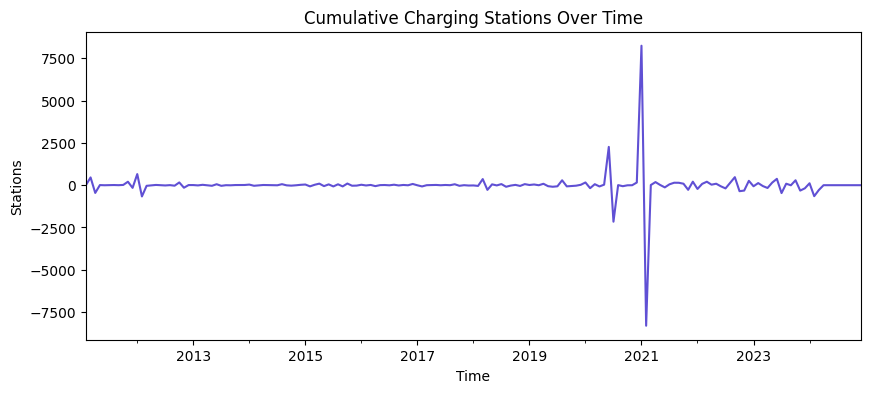

In [ ]:
ts_diff.plot(figsize=(10, 4), color="#6050D4", title="Cumulative Charging Stations Over Time")
plt.ylabel("Stations")
plt.show()

After **two rounds of differencing (d = 2)**, the p-value falls under 0.05, indicating that the series is stationary. This can be visualised using the plot of the differenced series. Given this, we proceed to fit the ARIMA model to our data.

In [ ]:
# Using d = 2, the model is fit.
pm.auto_arima(ts, d=2, seasonal=True, m=12, trace=True).summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=2677.836, Time=3.19 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=2766.179, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,2,0)(1,0,0)[12]             : AIC=2725.086, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,2,1)(0,0,1)[12]             : AIC=2671.216, Time=0.38 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=2669.308, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,2,1)(1,0,0)[12]             : AIC=2671.217, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,2,1)(1,0,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=2671.277, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,2,2)(0,0,0)[12]             : AIC=2671.273, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=2723.093, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,2,2)(0,0,0)[12]             : AIC=2672.208, Time=0.33 sec
 ARIMA(0,2,1)(0,0,0)[12] intercept   : AIC=2671.262, Time=0.14 sec

Best model:  ARIMA(0,2,1)(0,0,0)[12]          
Total fit time: 5.389 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -1332.654
Date:                Sun, 27 Apr 2025   AIC                           2669.308
Time:                        14:17:51   BIC                           2675.544
Sample:                    12-01-2010   HQIC                          2671.839
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8905      0.041    -21.783      0.000      -0.971      -0.810
sigma2       4.97e+05   8321.852     59.725      0.000    4.81e+05    5.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             89274.27
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):             103.06   Skew:                             9.81
Prob(H) (two-sided):                  0.00   Kurtosis:                       114.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We then identified a `SARIMAX(0,2,1)` model as the best fit. The seasonal component (m=12) captures yearly patterns in the growth of cumulative EV charging stations, which may be driven by the USA's annual policy cycles, or fiscal planning from relevant stakeholders.

In [ ]:
# Fit the ARIMA(0, 2, 1) model
model = SARIMAX(ts, order=(0, 2, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast into 2030, that is, the next 5 years
forecast = model_fit.forecast(steps=60)

print(forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



2025-01-01    65991.245990
2025-02-01    66248.803198
2025-03-01    66577.683807
2025-04-01    66860.367093
2025-05-01    67161.469830
2025-06-01    67644.304314
2025-07-01    67913.999514
2025-08-01    68237.446018
2025-09-01    68589.960466
2025-10-01    68958.973125
2025-11-01    69259.418747
2025-12-01    69599.801435
2026-01-01    70558.753173
2026-02-01    70841.030825
2026-03-01    71170.655184
2026-04-01    71457.217192
2026-05-01    71760.948698
2026-06-01    72234.079549
2026-07-01    72508.534848
2026-08-01    72833.093864
2026-09-01    73184.816118
2026-10-01    73551.849148
2026-11-01    73854.968131
2026-12-01    74195.314032
2027-01-01    75175.786691
2027-02-01    75479.448546
2027-03-01    75832.084178
2027-04-01    76141.444718
2027-05-01    76468.059578
2027-06-01    76964.910667
2027-07-01    77262.104687
2027-08-01    77609.649951
2027-09-01    77984.487708
2027-10-01    78374.716820
2027-11-01    78700.716132
2027-12-01    79064.126274
2028-01-01    80066.200257
2

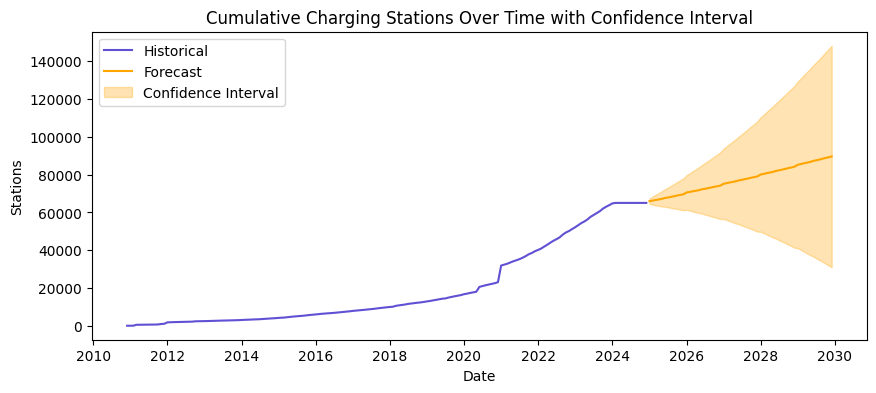

In [ ]:
# Plotting historical data
plt.figure(figsize=(10, 4))
plt.plot(ts, label="Historical", color="#6050D4")

# Plotting forecasted data
plt.plot(forecast, label="Forecast", color="#FFA500")

# Plotting confidence interval
forecast_ci = model_fit.get_forecast(steps=len(forecast)).conf_int()
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="orange", alpha=0.3, label="Confidence Interval")

# Title, Labels and Legend
plt.title("Cumulative Charging Stations Over Time with Confidence Interval")

plt.xlabel("Date")
plt.ylabel("Stations")

plt.legend()

plt.show()

Here, we forecasted the number of charging stations **five years into the future (up to 2030)**. This included forecasts with **95% confidence intervals**, offering a probability-based interpretation of future trends. Moreover, this forecast shows a **continued upward trajectory**, consistent with historical trends, and supporting the assumption that investment in EV infrastructure is ongoing, and growth will continue.


### Gasoline Price Forecasting

In [ ]:
# Set "Time" as the index
ts1 = df_merged.set_index("Time")
ts1.index = pd.to_datetime(ts.index, format='%Y/%m')

# Retain only "Gasoline Price"
ts1 = ts1["Gasoline Price"]

print(ts1)

Time
2010-12-01    3.048
2011-01-01    3.148
2011-02-01    3.264
2011-03-01    3.615
2011-04-01    3.852
              ...  
2024-08-01    3.507
2024-09-01    3.338
2024-10-01    3.261
2024-11-01    3.175
2024-12-01    3.139
Name: Gasoline Price, Length: 169, dtype: float64


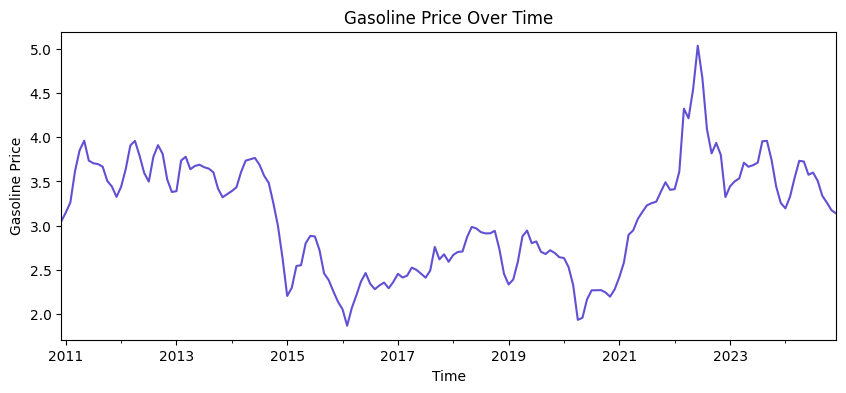

In [ ]:
ts1.plot(figsize=(10, 4), color="#6050D4", title="Gasoline Price Over Time")
plt.ylabel("Gasoline Price")
plt.show()

Again, we conducted the **Augmented Dickey-Fuller Test** to determine the appropriate degree of differencing ("d") with the following hypotheses:
- **Null Hypothesis**: It is non-stationary (exhibits trends and/or seasonality that varies over time).
- **Alternative Hypothesis**: It is stationary (its statistical properties are consistent over time).


In [ ]:
# Initial Test for Stationary
adf_result = adfuller(ts1)[1]
print(adf_result)

0.20008742817126524


The test gives a **p-value** of **0.19998**, a large number providing insufficient evidence to reject null hypothesis. This means that the gasoline price series is also **non-stationary**, and that differencing needs to be carried out until p < 0.05.

In [ ]:
ts1_diff = ts1.copy()

d = 0 # number of times of differencing needed to the series stationary
while adf_result > 0.05:
  d += 1
  ts1_diff = ts1_diff.diff().dropna()
  adf_result = adfuller(ts1_diff)[1]
  print(f"p-value: {adf_result}")

print(f"d = {d}")

p-value: 1.7491332091270983e-14
d = 1


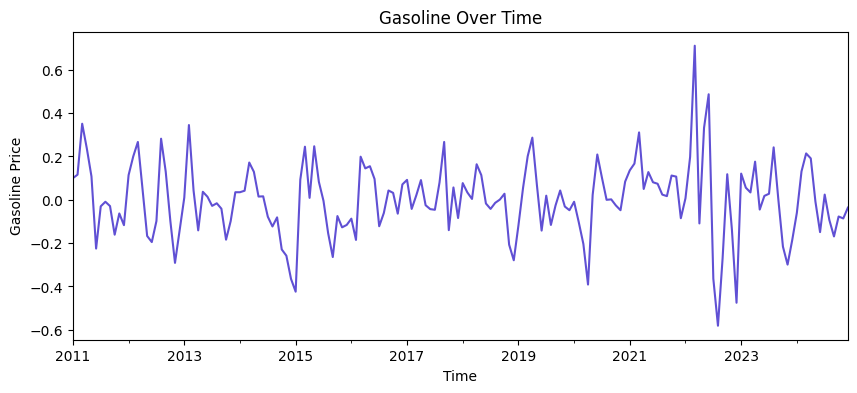

In [ ]:
ts1_diff.plot(figsize=(10, 4), color="#6050D4", title="Gasoline Over Time")
plt.ylabel("Gasoline Price")
plt.show()

After a single round of differencing (d = 1), the p-value fell under 0.05, indicating that the series has achieved stationarity. This can be visualised using the plot of the differenced series.

In [ ]:
# Using d = 1, the model is fit.
pm.auto_arima(ts1, d=1, seasonal=True, m=12, trace=True).summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-110.322, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-133.317, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-140.759, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-112.320, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-140.961, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-140.917, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-138.987, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-138.989, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-133.553, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=-142.959, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=-142.915, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,1)[12]             : AIC=-142.756, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(1,0,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=-140.984, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=-140.987, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,0)[12]             : AIC=-135.551, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(0,0,0)[12]             : AIC=inf, Time=1.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 6.900 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  73.479
Date:                Sun, 27 Apr 2025   AIC                           -142.959
Time:                        14:18:00   BIC                           -136.711
Sample:                    12-01-2010   HQIC                          -140.423
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4686      0.043     10.816      0.000       0.384       0.553
sigma2         0.0244      0.002     12.639      0.000       0.021       0.028
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                26.70
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                             0.30
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best-fit ARIMA model identified was `SARIMAX(0, 1, 1)`, again accounting for seasonal fluctuations with m = 12, and hence we proceed to fit the model.

In [ ]:
# Fit the ARIMA(0, 1, 1) model
model = SARIMAX(ts1, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast into 2030, that is, the next 5 years
forecast1 = model_fit.forecast(steps=60)


print(forecast1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



2025-01-01    3.174635
2025-02-01    3.253602
2025-03-01    3.437038
2025-04-01    3.500272
2025-05-01    3.570352
2025-06-01    3.587384
2025-07-01    3.546838
2025-08-01    3.508409
2025-09-01    3.478930
2025-10-01    3.416641
2025-11-01    3.306310
2025-12-01    3.184901
2026-01-01    3.186751
2026-02-01    3.265810
2026-03-01    3.449301
2026-04-01    3.512763
2026-05-01    3.582703
2026-06-01    3.599440
2026-07-01    3.559009
2026-08-01    3.520483
2026-09-01    3.490754
2026-10-01    3.428439
2026-11-01    3.318152
2026-12-01    3.196895
2027-01-01    3.198805
2027-02-01    3.277864
2027-03-01    3.461355
2027-04-01    3.524816
2027-05-01    3.594757
2027-06-01    3.611494
2027-07-01    3.571063
2027-08-01    3.532537
2027-09-01    3.502809
2027-10-01    3.440494
2027-11-01    3.330207
2027-12-01    3.208950
2028-01-01    3.210859
2028-02-01    3.289918
2028-03-01    3.473409
2028-04-01    3.536870
2028-05-01    3.606811
2028-06-01    3.623548
2028-07-01    3.583117
2028-08-01 

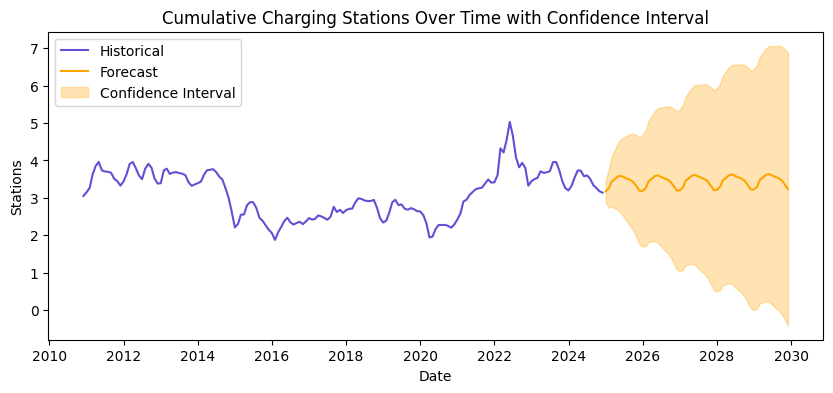

In [ ]:
# Plotting historical data
plt.figure(figsize=(10, 4))
plt.plot(ts1, label="Historical", color="#6050D4")

# Plotting forecasted data
plt.plot(forecast1, label="Forecast", color="#FFA500")

# Plotting confidence interval
forecast_ci = model_fit.get_forecast(steps=len(forecast)).conf_int()
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="orange", alpha=0.3, label="Confidence Interval")

# Title, Labels and Legend
plt.title("Cumulative Charging Stations Over Time with Confidence Interval")

plt.xlabel("Date")
plt.ylabel("Stations")

plt.legend()

plt.show()

Like with the series for the cumulative EV charging stations, we also extended the gasoline price series **5 years forward** into **2030**, where the confidence interval is also illustrated. The results suggest a **net-zero** trend, with **recurring seasonal fluctuations** in between, suggesting that gasoline prices are to change seasonally and return to previous prices repeatedly with the seasonality.

These time series forecasts form inputs for our final regression model, where they act as **predictors**, for our EV adoption rate forecasts.

### Regression Analysis

Given the relationship between `Adoption Rate`, `Cumulative Charging Stations`, and `Gasoline Price`, we aim to employ **Ordinary Least Square (OLS)** model to forecast adoption rates over the next five years.

The process is carried out in the following steps:
1. **Model Training**: Using historical data, a multiple linear regression model is fit with `Cumulative Charging Stations` and `Gasoline Price` as predictors of EV adoption rate.
2. **Model Evaluation**: The regression summary is printed, and key metrics such as adjusted R-squared and p-values are assessed to evaluate model performance.
3. **Forecast-Based Prediction**: Forecasted values of `Cumulative Charging Stations` and `Gasoline Price` from the ARIMA model are input into the trained regression model to predict EV adoption rates for the next five years.

#### Assessing Skewness

We begin by testing the **skewness** of the features to assess the symmetry of their distributions.


In [ ]:
print("Adoption Rate:", skew(df_merged["Adoption Rate"]))
print("Cumulative Charging Stations:", skew(df_merged["Cumulative Charging Stations"]))
print("Gasoline Price:", skew(df_merged["Gasoline Price"]))

Adoption Rate: 1.3881290850318488
Cumulative Charging Stations: 1.0522957671482986
Gasoline Price: 0.11556558024132894


Both Adoption Rate and Cumulative Charging Stations exhibit **skewness greater than 1**, suggesting a high level of **asymmetry in their distributions**.  

To stabilize variance and improve model performance, we apply a **log transformation** prior to fitting a linear regression model.

#### Applying Log Transformation

In [ ]:
# Appling log transformation and preparing independent variables
X = pd.DataFrame({
    "Log Charging Stations": np.log1p(df_merged["Cumulative Charging Stations"]),
    "Gasoline Price": df_merged["Gasoline Price"]
})

# Applying log transformation to dependent variable too
y = np.log1p(df_merged["Adoption Rate"])

With the regression model established, we proceed to use the previously forecasted time series values of `Cumulative Charging Stations` and `Gasoline Price` as inputs.

These forecasts are then fed into the model to predict the future `Adoption Rate`, leveraging the relationships identified in our earlier analysis.

#### Fitting the Model

In [ ]:
# Fitting the OLS model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

#### Evaluating the Model

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption Rate   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     547.4
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           8.25e-74
Time:                        14:18:03   Log-Likelihood:                 17.993
No. Observations:                 169   AIC:                            -29.99
Df Residuals:                     166   BIC:                            -20.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.76

The OLS regression model yields a **strong fit**, with an **adjusted R-squared value of 0.867**, indicating that approximately 87% of the variance in Adoption Rate is explained by the predictors: `Log Charging Stations` and `Gasoline Price`. Both independent variables are **highly significant (p-values < 0.001)**, suggesting strong linear relationships with the dependent variable.

#### Forecasting Adoption Rate

In [ ]:
# Applying log transformation to our forecast features
forecast_features = pd.DataFrame({
    "Log Charging Stations": np.log1p(forecast),  # match model input
    "Gasoline Price": forecast1
})

# Making predictions in log1p scale
forecast_features = sm.add_constant(forecast_features)
adoption_rate_forecasted_log = model.predict(forecast_features)

# Converting predictions back to original scale
adoption_rate_forecasted = np.expm1(adoption_rate_forecasted_log)

# Printing the result
df_forecasted = pd.DataFrame({
    "Time": pd.date_range(forecast.index.min(), forecast.index.max(), freq="MS"),
    "Adoption Rate": adoption_rate_forecasted
})

df_forecasted = df_forecasted.set_index("Time")
print(df_forecasted)

            Adoption Rate
Time                     
2025-01-01      12.057151
2025-02-01      12.483622
2025-03-01      13.506871
2025-04-01      13.891216
2025-05-01      14.327934
2025-06-01      14.470638
2025-07-01      14.251061
2025-08-01      14.051274
2025-09-01      13.908086
2025-10-01      13.580246
2025-11-01      12.990482
2025-12-01      12.369619
2026-01-01      12.447005
2026-02-01      12.887208
2026-03-01      13.939692
2026-04-01      14.335623
2026-05-01      14.783053
2026-06-01      14.924682
2026-07-01      14.698280
2026-08-01      14.490419
2026-09-01      14.339672
2026-10-01      14.000178
2026-11-01      13.392423
2026-12-01      12.752989
2027-01-01      12.830078
2027-02-01      13.283025
2027-03-01      14.365613
2027-04-01      14.773138
2027-05-01      15.233567
2027-06-01      15.378667
2027-07-01      15.146178
2027-08-01      14.932516
2027-09-01      14.777473
2027-10-01      14.428227
2027-11-01      13.803337
2027-12-01      13.145694
2028-01-01  

When applying a log transformation during model training and prediction (log1p and expm1), **numerical discrepancies** can arise due to scaling differences or transformations that **aren't perfectly invertible**—especially when compounded with forward-looking inputs like forecasts. These predicted values, while directionally accurate, may not align perfectly with the most recent actual data point.

By adjusting the forecasted series to match the last observed value (December 2024), we ensure continuity between historical data and future predictions. This scaling aligns the forecast with reality, which:

- reduces visual or interpretive discontinuities in the trend line
- Corrects any bias introduced from the log transformation and model scaling effects

Essentially, we're anchoring our future predictions to the most recent known value to **preserve coherence in our overall time series**.

#### Adjusting the Forecast

In [ ]:
# Using December 2024 as the base value
base_val = df_merged["Adoption Rate"].iloc[-1]

first_pred_val = adoption_rate_forecasted.iloc[0]

# Calculating scaling ratio
scaling_factor = base_val / first_pred_val

# Adjusting entire forecast
df_forecasted["Adoption Rate"] = df_forecasted["Adoption Rate"] * scaling_factor

print(df_forecasted)

            Adoption Rate
Time                     
2025-01-01      22.358823
2025-02-01      23.149671
2025-03-01      25.047188
2025-04-01      25.759919
2025-05-01      26.569769
2025-06-01      26.834400
2025-07-01      26.427216
2025-08-01      26.056731
2025-09-01      25.791201
2025-10-01      25.183254
2025-11-01      24.089593
2025-12-01      22.938264
2026-01-01      23.081768
2026-02-01      23.898083
2026-03-01      25.849812
2026-04-01      26.584029
2026-05-01      27.413744
2026-06-01      27.676381
2026-07-01      27.256541
2026-08-01      26.871082
2026-09-01      26.591536
2026-10-01      25.961978
2026-11-01      24.834955
2026-12-01      23.649186
2027-01-01      23.792141
2027-02-01      24.632087
2027-03-01      26.639642
2027-04-01      27.395357
2027-05-01      28.249179
2027-06-01      28.518253
2027-07-01      28.087123
2027-08-01      27.690909
2027-09-01      27.403396
2027-10-01      26.755753
2027-11-01      25.596955
2027-12-01      24.377419
2028-01-01  

#### Visualizing the Forecast

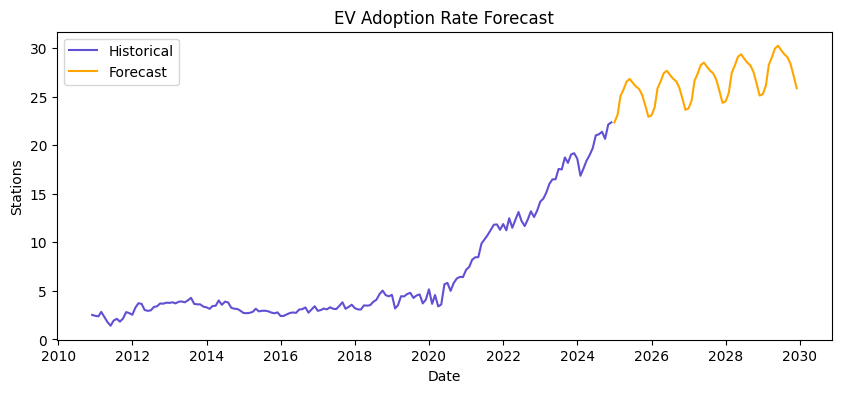

In [ ]:
df_merged = df_merged.set_index("Time")
df_merged.index = pd.to_datetime(df_merged.index, format='%Y/%m')

# Plotting historical data
plt.figure(figsize=(10, 4))
plt.plot(df_merged["Adoption Rate"], label="Historical", color="#6050D4")

# Plotting forecasted data
plt.plot(df_forecasted["Adoption Rate"], label="Forecast", color="#FFA500")

# Title, Labels and Legend
plt.title("EV Adoption Rate Forecast")

plt.xlabel("Date")
plt.ylabel("Stations")

plt.legend()

plt.show()

## **Possible Action Based on Results**

Based on our findings, there is clear evidence that **EV adoption is tied to both the expansion of charging infrastructure and the fluctuations in gasoline prices in the USA**.


The forecasted trend for continued growth in EV adoption, as well as the identified correlation with the other 2 variables that causes an element of seasonality and trend to EV adoption rates, can provide valuable information for stakeholders involved:


*   **Policy makers** can use the information towards accelerating the deployment of EV charging stations in order to bolster/encourage EV adoption in these regions.
*   **Energy and automotive industries/businesses** can use this analysis to prepare for shifts in consumer demand influenced by trends in fuel prices and charging station infrastructure availability.
* **Urban planners** may be able to use our model to anticipate growing EV densities and plan around this accordingly.
* Interested **researchers and analysts** may extend our study by expanding the investigation to other regions, integrating more granularity, including data specifically from certain EV manufacturers, or involving socio or demographic data to improve precision and scope.


## **Final Reflection**

Our project illustrates the ability of **data science techniques** (e.g. statistical modeling), when combined with **real-world data**, to provide **practical and valuable insights** that are increasingly relevant today.


Despite us focusing our investigation on the US, our analysis can be ***applicable to other developed economies and regions undergoing adoption/transitions to Electric Vehicles***, and our results may prove helpful to these economies for further planning of the EV landscape.


Nonetheless, as with all projects and investigations, we acknowledge **limitations** such as:
*   Our analysis results based on US data may not be applicable to all regions worldwide due to the presence of **regional disparities** (e.g. the US being a developed country, whereas our data may not be useful in LDCs with significantly less EV adoption and infrastructure)
*   Our analysis **does not include socio-demographic data** that may potentially be impactful to the adoption of EVs (e.g. income levels, urbanisation, government EV incentives), which may lead to a generalisation where the impact of these variables are not studied or assessed.


Nevertheless, these limitations could be improved upon with future iterations of the project that would increase in granularity by incorporating additions such as regional segmentation (e.g. LDCs), consumer buying power, and more.


## **Consideration on Data Ethics**

All datasets used were publicly available (sourced from official bodies, either through Kaggle, industry/company, or government websites), non-personal, and searchable via Google. However, we do need to consider the following:


*   **Attribution to authors**: While we referenced the source websites during the process, we did not explicitly retain all metadata giving credit, and did not mention the specific authors to the datasets. If we decided to publish the derived dataset or notebook, we would neet to make sure proper attribution is given and ensure data use is compliant with licences.
*   **Possible data bias or lack of representation**: Our analysis reflects mainly the US EV market, which is considered already one of the most developed EV landscapes. Due to this, results may not translate or allow generalisation for developing regions or underserved communities where the EV infrastructure, and consumers' behaviours, differ.


## **Consideration on Data Privacy and Security**

This study purely uses open data not containing any personal information. As such, there are no special risks or measures to be taken concerning data privacy or security.


Nonetheless, if future iterations of this investigation were to incorporate more personal data, appropriate measures will need to be taken at that point to anonymize the data with regards to data privacy and security.


THANK YOU PROF MELANIE :)